<a href="https://colab.research.google.com/github/ykamen/CS4342/blob/main/CS4342_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
tr_labels = np.load('drive/MyDrive/fashion_mnist_train_labels.npy', 'r')
tr_images = np.load('drive/MyDrive/fashion_mnist_train_images.npy', 'r')
te_images = np.load('drive/MyDrive/fashion_mnist_test_images.npy', 'r')
te_labels = np.load('drive/MyDrive/fashion_mnist_test_labels.npy', 'r')

In [123]:
def append1s(imgs):
  rowof1s = np.ones((imgs.shape[0],1))
  Xtilde = np.hstack((imgs,rowof1s))
  return Xtilde

def initws(imgs):
  w = np.zeros((imgs.shape[1],10))
  for i in range(10):
    wi = 1e-5 * np.random.randn(imgs.shape[1])
    w[:,i] = wi
  return w

def softmax(xtilde,ws):
  Z = xtilde.dot(ws)
  yhat = np.exp(Z)
  for i in range(Z.shape[0]):
    temp = np.sum(yhat[i])
    yhat[i] = yhat[i]/temp
  return yhat

def onehot(labels):
  n_values = np.max(labels) + 1
  onehotys = np.eye(n_values)[labels]
  return onehotys

def SGD(trImages, trLabels, epsilon, batchSize, alpha=.01):
  indeces = np.arange(trLabels.shape[0])
  np.random.shuffle(indeces)
  a = trLabels.shape[0] / batchSize
  xtilde = append1s(trImages)
  xt = xtilde.T
  wtilde = initws(xtilde)
  yhat0 = softmax(xtilde,wtilde)
  y = onehot(trLabels)
  for i in range(int(a)):
    ind = np.split(indeces,a)[i]
    batchyhat = yhat0[ind]
    batchy = y[ind]
    batchx = xt[:,ind]
    tempgrad = batchx.dot(batchyhat-batchy)/batchSize
    fingrad = epsilon*(tempgrad+alpha*wtilde/batchSize)
    wtilde = wtilde - fingrad
    if (i >= (int(a)-20)):
      wt = wtilde.T
      temp1 = np.sum(batchy*np.log(batchyhat))/(-batchSize)
      temp2 = np.sum(wt.dot(wtilde))*alpha/(2*batchSize)
      print(f"Loss at batch {i+1} is {temp1-temp2}")
  return wtilde

def plotw(w):
  fin = w[:-1]
  return plt.imshow(fin.reshape(28,28))

def pc(ws, teIm, teLa):
  a = teIm.dot(ws)
  c = 0
  for i in range(teIm.shape[0]):
    print(f"{np.argmax(a[i])},{teLa[i]}")
    if np.argmax(a[i]) == teLa[i]:
      c = c+1
  return c/teIm.shape[0]

[[ 0.00285415  0.02366363  0.02120957 ...  0.0454325   0.03428625
  -0.00714555]
 [ 0.00312546  0.00597717  0.01474081 ...  0.03424523  0.06114692
  -0.05519485]
 [ 0.01578992  0.01046796  0.00223912 ...  0.016064    0.022553
  -0.03052561]
 ...
 [ 0.0043652   0.01514739  0.02374058 ...  0.04606839  0.05890798
  -0.02678474]
 [ 0.00362298  0.00553457  0.00991116 ...  0.01105651  0.02363814
  -0.0198661 ]
 [ 0.00126813  0.01217273 -0.00391573 ...  0.00547556  0.02621546
   0.00258208]]
[[1.00285822 1.02394583 1.0214361  ... 1.04648037 1.0348808  0.99287991]
 [1.00313034 1.00599507 1.01484999 ... 1.03483834 1.06305509 0.94630075]
 [1.01591524 1.01052294 1.00224163 ... 1.01619372 1.02280924 0.96993559]
 ...
 [1.00437474 1.01526269 1.02402463 ... 1.04714602 1.06067763 0.97357079]
 [1.00362955 1.00554991 1.00996043 ... 1.01111786 1.02391973 0.98032993]
 [1.00126894 1.01224712 0.99609193 ... 1.00549058 1.02656211 1.00258542]]
Loss at batch 581 is 2.299732857410193
Loss at batch 582 is 2.2991

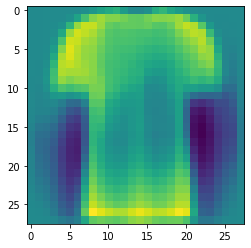

In [91]:
w = SGD(tr_images,tr_labels,.003,100)
plotw(w[:,0])

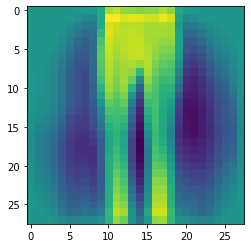

In [31]:
plotw(w[:,1])

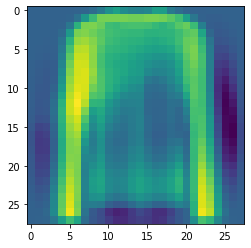

In [32]:
plotw(w[:,2])

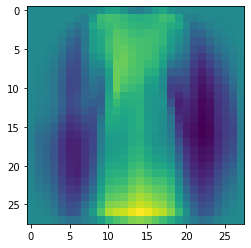

In [33]:
plotw(w[:,3])

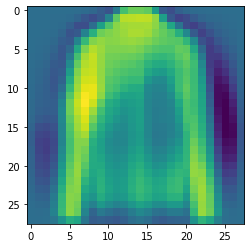

In [34]:
plotw(w[:,4])

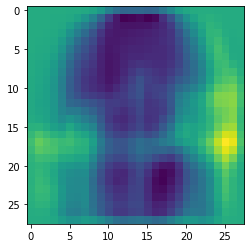

In [35]:
plotw(w[:,5])

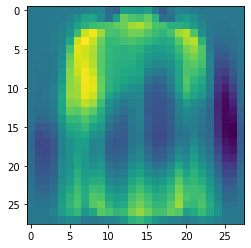

In [36]:
plotw(w[:,6])

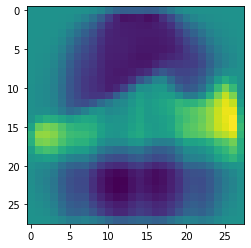

In [37]:
plotw(w[:,7])

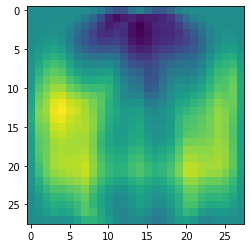

In [38]:
plotw(w[:,8])

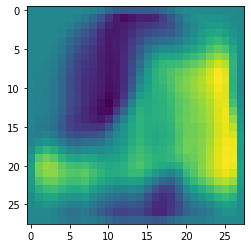

In [39]:
plotw(w[:,9])

In [124]:
pc(w,append1s(te_images),te_labels)

Streaming output truncated to the last 5000 lines.
4,2
4,3
4,6
4,4
4,6
3,3
4,6
9,9
4,4
9,9
4,0
8,8
4,3
9,5
4,6
4,2
4,0
1,1
4,3
9,9
4,4
4,2
8,5
4,0
8,5
4,3
4,2
9,5
4,0
4,0
4,0
4,0
4,0
9,9
4,1
4,3
4,4
4,3
9,5
9,5
4,6
4,6
1,1
4,4
9,9
9,7
4,4
4,4
9,7
9,5
9,7
4,1
4,6
8,8
9,7
9,9
9,5
9,7
4,0
4,2
9,9
4,2
4,5
4,0
8,7
4,6
4,4
9,5
4,2
9,9
4,4
4,3
4,2
9,5
9,9
4,2
8,5
8,9
8,7
4,3
4,8
4,3
9,5
4,6
9,5
4,3
4,0
9,7
4,6
9,9
9,5
4,1
4,3
4,6
9,9
3,3
4,6
4,2
8,5
4,3
4,4
9,9
9,9
4,1
4,2
4,2
4,2
4,4
4,6
8,8
8,7
9,9
9,9
4,4
4,8
4,8
9,9
4,0
8,7
4,0
4,4
4,3
4,8
4,6
4,4
4,2
4,0
4,1
4,4
4,0
4,2
4,1
9,5
4,4
4,6
4,6
4,0
4,3
4,4
9,5
4,6
4,8
9,7
4,6
4,0
4,3
1,1
4,8
4,8
8,8
4,9
9,9
9,5
9,5
4,8
4,6
9,5
4,4
4,4
4,2
9,5
4,6
9,9
4,2
9,9
4,1
4,0
4,4
4,6
4,6
9,9
4,8
4,0
4,4
9,9
1,1
9,9
4,4
9,7
4,3
9,5
4,4
4,3
4,4
4,6
4,1
4,6
4,2
4,4
0,3
8,7
4,8
4,4
9,5
4,5
9,9
0,0
4,6
4,3
4,4
9,5
9,5
9,5
9,7
4,3
1,1
4,3
4,3
8,7
4,0
8,7
8,7
4,6
8,8
4,3
9,5
9,5
4,8
1,1
9,9
4,4
4,0
4,4
4,2
1,1
4,6
4,0
4,1
4,6
9,5
4,0
4,8
4,1
4,1
8,7
8,5
4,2
9

0.2735